In [1]:
import numpy as np
import pandas as pd
import sklearn
X = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test_data = test.to_numpy().reshape(-1,28,28)


In [2]:
X

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X.shape

(42000, 785)

In [4]:
X_train = X.iloc[:,1:]
y_train = X.iloc[:,0]

In [5]:
X_train, y_train

(       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 41995       0       0       0       0       0       0       0       0       0   
 41996       0       0       0       0       0       0       0       0       0   
 41997       0       0       0       0       0       0       0       0       0   
 41998       0       0       0       0       0       0       0       0       0   
 41999       0       0       0       0       0       0       0       0       0   
 
        pixel9

In [6]:
from sklearn.model_selection import ShuffleSplit
data = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# data.get_n_splits(X)
for train_index, test_index in data.split(X_train):
    print("Train:", train_index, "test:",test_index)

Train: [39317 32837 16644 ... 30403 21243  2732] test: [16275 19204 18518 ... 26193 26564 27420]


In [7]:
train_index.shape, test_index.shape

((33600,), (8400,))

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
cnnimg = plt.imread('test.png')
print("shape of cnnimg", cnnimg.shape)

shape of cnnimg (856, 1530, 4)


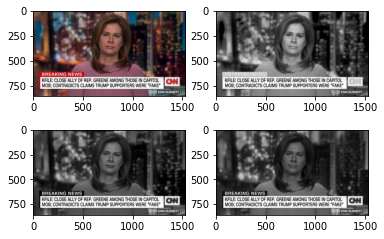

In [9]:
fig = plt.figure()
a = fig.add_subplot(2,2,1)
imgplot = plt.imshow(cnnimg)
a = fig.add_subplot(2,2,2)
imgplot = plt.imshow(cnnimg[:,:,0],cmap='gray')
a = fig.add_subplot(2,2,3)
imgplot = plt.imshow(cnnimg[:,:,1],cmap='gray')
a = fig.add_subplot(2,2,4)
imgplot = plt.imshow(cnnimg[:,:,2],cmap='gray')



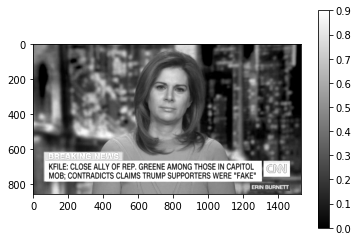

In [10]:
imgplot = plt.imshow(cnnimg[:,:,0],cmap="gray",clim=(0,0.9))
plt.colorbar()

In [11]:
X_train.shape

(42000, 784)

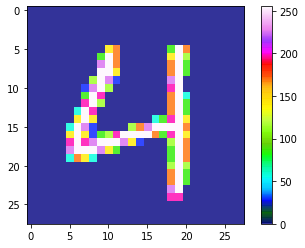

In [12]:
digits_data = X_train.to_numpy().reshape(-1,28,28)
imgplot = plt.imshow(digits_data[205],cmap='gist_ncar',alpha=0.8)
plt.colorbar()

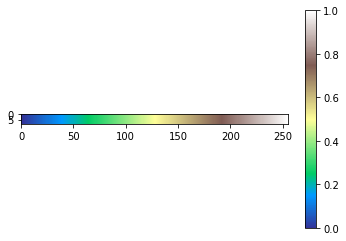

In [13]:
height = 10
width = 256
band = [[j/(width-1) for j in range(0,width)] for i in range(0,height)]
imgplot = plt.imshow(band, cmap = 'terrain')
plt.colorbar()

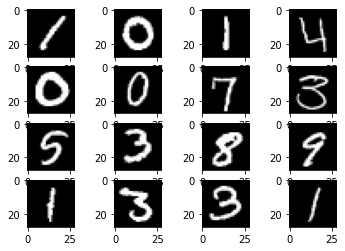

In [14]:
import matplotlib.figure as figure
digimg = X_train.to_numpy().reshape(-1,28,28)
fig = plt.figure()
#figure.SubplotParams(wspace=30,hspace=15)
x_nums = 4
y_nums = 4
for i in range(0,x_nums):
    for j in range(0,y_nums):
        seq = i*y_nums+j
        a = fig.add_subplot(x_nums,y_nums,seq+1)
        imgplot = plt.imshow(digimg[seq],cmap='gray')

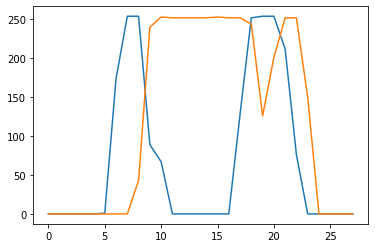

In [15]:
fig, ax = plt.subplots()
ax.plot(digimg[1,10].T)
ax.plot(digimg[10,10].T)

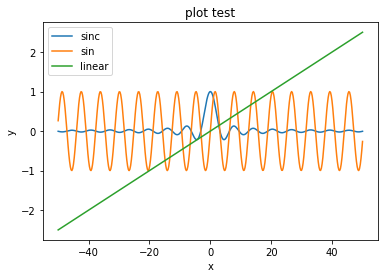

In [16]:
x = np.linspace(-50,50,400)
y1 = np.sin(x)/x
y2 = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y1,label='sinc')
ax.plot(x,y2,label='sin')
#ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('plot test')
plt.plot(x,x/20,label='linear')
plt.legend()

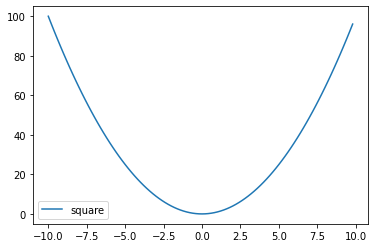

In [17]:
plt.plot(np.arange(-10,10,0.2),np.arange(-10,10,0.2)**2,label='square')

plt.legend()

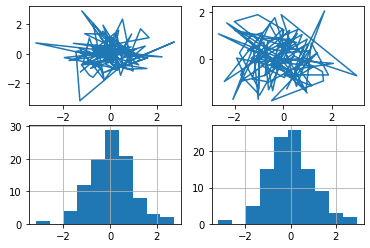

In [18]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(2,2)
ax[0,0].plot(data1,data2)
ax[0,1].plot(data3,data4)
p1 = pd.Series(data1)
p2 = pd.Series(data2)
p1.hist(ax=ax[1,0])
p2.hist(ax=ax[1,1])
plt.draw()

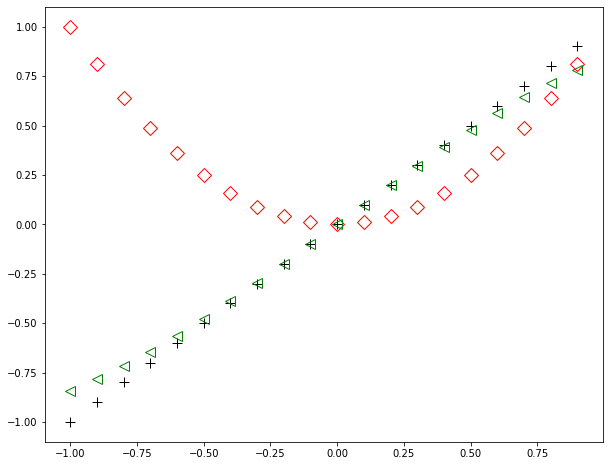

In [19]:
x = np.arange(-1,1,0.1)
plt.figure(figsize=(10,8))
plt.plot(x,x,'+k',x,x**2,'Dr',x,np.sin(x),'g<',markersize=10,fillstyle='none')

# y.hist(bins=100)
plt.draw()

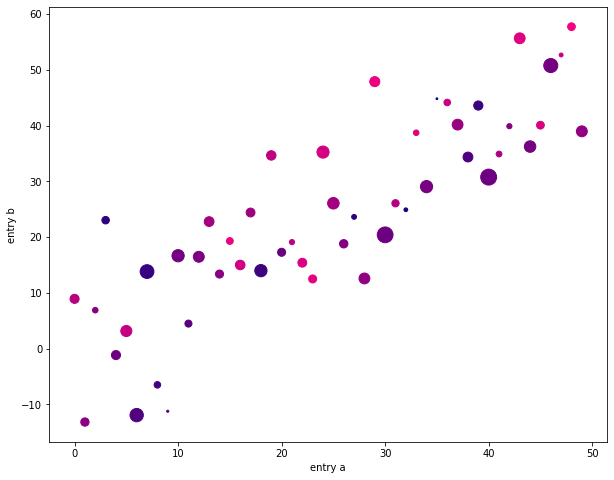

In [20]:
data = {'a': np.arange(50),
        'c': np.random.rand(50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
data['c'] = np.c_[data['c'],np.zeros(50),np.ones(50)/2]
plt.figure(figsize=(10,8))
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')

plt.show()

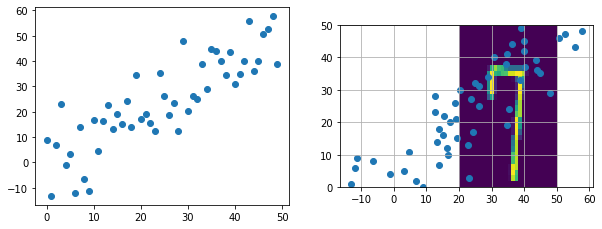

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.scatter('a','b',data=data)
plt.subplot(222)

plt.imshow(digimg[50],extent=(20,50,0,50))
plt.scatter('b','a',data=data)
plt.grid(True)
# plt.xscale('log')
# plt.yscale('log')


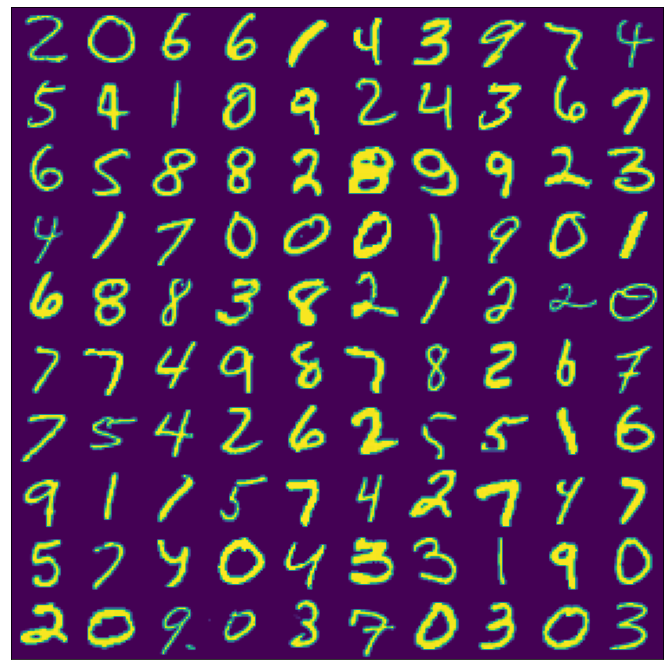

In [22]:
plt.figure(figsize=(12,12))
arraysize = 10
imagesize = 1
plt.xlim(0,arraysize*imagesize)
plt.ylim(0,arraysize*imagesize)
plt.xticks([])
plt.yticks([])

for i in range(0,arraysize):
    for j in range(0,arraysize):
        plt.imshow(test_data[i*arraysize+j],extent=(j*imagesize,(j+1)*imagesize,i*imagesize,(i+1)*imagesize))


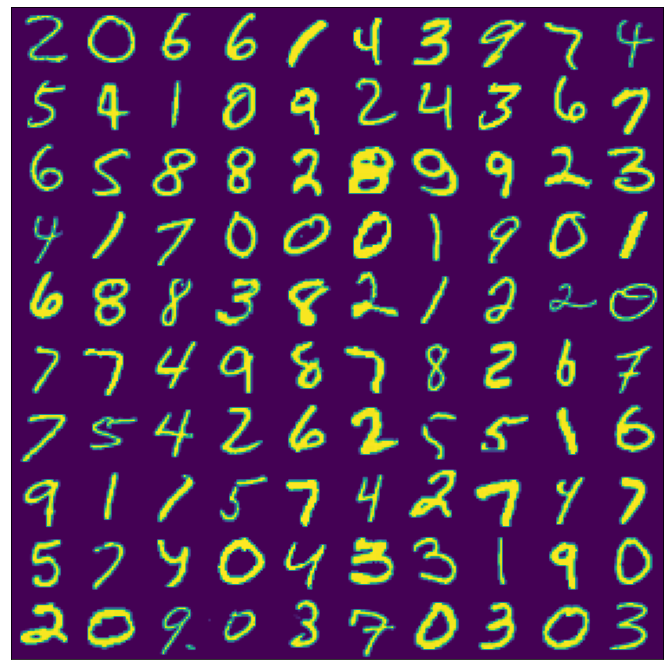

In [23]:
def plotdataset(data, arraysize):
    plt.figure(figsize=(12,12))
    plt.xlim(0,arraysize)
    plt.ylim(0,arraysize)
    plt.xticks([])
    plt.yticks([])

    for i in range(0,arraysize):
        for j in range(0,arraysize):
            plt.imshow(data[i*arraysize+j],extent=(j,j+1,i,i+1))

plotdataset(test_data,10)

In [24]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

In [25]:
digits['data'].shape

(1797, 64)

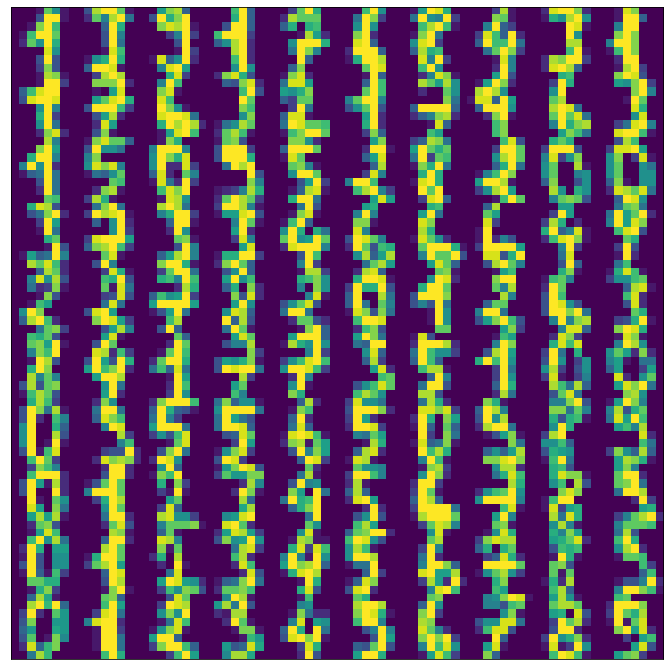

In [26]:
d2 = digits['data'].reshape(-1,8,8)
# plotdataset(d2,42)
plotdataset(digits.images,10)

In [27]:
digits.target[0:50]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0])

correct 143, wrong 14


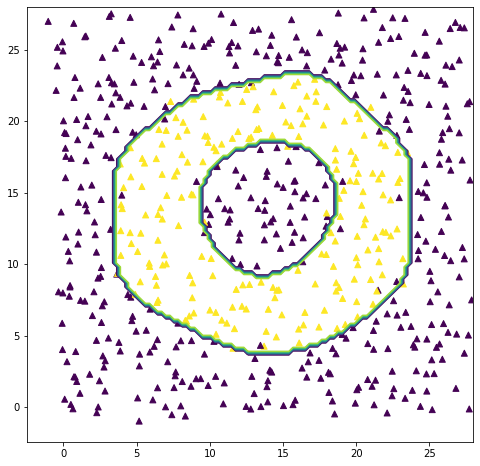

In [87]:
dots = 28
dots2 = dots * dots
#plt.imshow(digimg[1])
#np.random.seed(0)
y_grid = np.array(list(range(dots))*dots)
x_grid = y_grid.reshape(dots,dots).T.reshape(-1)
z = np.array(digimg[1] > 0).reshape(-1)
x_grid = y_grid.reshape(dots,dots).T.reshape(-1)
sigma = 0.5
x = x_grid + np.random.randn(dots2)*sigma
y = y_grid + np.random.randn(dots2)*sigma
z = np.array(digimg[1] > 0).reshape(-1)
r = 0.8 # ratio of randomly selected dots
pts = int(r*dots2)
data = np.random.permutation(np.c_[x,y,z])

from sklearn import svm
clf = svm.SVC(gamma = 0.02, C = 100.)
clf.fit(data[:pts,0:2],data[:pts,2])

grids = 101
x = np.linspace(0,dots,grids)
y = np.linspace(0,dots,grids)
xx, yy = np.meshgrid(x,y)


plt.figure(figsize=(8,8))
plt.contour(xx,yy,clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(grids,grids))
plt.scatter(data[:pts,0],data[:pts,1],c=data[:pts,2],marker='^')

print("correct {}, wrong {}".format(sum(clf.predict(data[pts:,0:2])==data[pts:,2]),sum(clf.predict(data[pts:,0:2])!=data[pts:,2])))